In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [94]:

df_net = pd.read_csv('FSVA-Nasional_2022_514_KabupatenKota.csv')
df_net.head()

,Wilayah,Komposit,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),IKP,IKP Ranking,Unnamed: 13
0,aceh - aceh selatan,5,0.78,13.18,52.86,0.00,46.34,8.75,2.43,64.40,27.3,71.02,274,NaN
1,aceh - aceh tenggara,6,0.28,13.41,38.71,0.00,41.55,9.62,2.87,68.22,34.1,77.39,188,NaN
2,aceh - aceh timur,6,0.52,14.45,32.76,0.00,33.96,8.66,2.01,68.74,38.2,76.55,200,NaN
3,aceh - aceh tengah,4,2.57,15.26,28.92,0.24,42.25,10.10,2.45,68.86,34.3,63.93,326,NaN
4,aceh - aceh barat,6,0.56,18.81,38.49,0.00,21.76,10.22,1.82,67.99,27.4,77.56,184,NaN


In [95]:
df_net.isna().sum()
df_net = df_net.drop(columns=['Unnamed: 13'])
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Wilayah                         514 non-null    object 
 1   Komposit                        514 non-null    int64  
 2   NCPR                            514 non-null    float64
 3   Kemiskinan (%)                  514 non-null    float64
 4   Pengeluaran Pangan (%)          514 non-null    float64
 5   Tanpa Listrik (%)               514 non-null    float64
 6   Tanpa Air Bersih (%)            514 non-null    float64
 7   Lama Sekolah Perempuan (tahun)  514 non-null    float64
 8   Rasio Tenaga Kesehatan          514 non-null    float64
 9   Angka Harapan Hidup (tahun)     514 non-null    float64
 10  Stunting (%)                    514 non-null    float64
 11  IKP                             514 non-null    float64
 12  IKP Ranking                     514 

In [96]:
df_net.describe()

,Komposit,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Harapan Hidup (tahun),Stunting (%),IKP,IKP Ranking
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,5.038911,1.268619,12.273152,25.796907,2.646051,30.154358,8.612374,4.705000,69.656809,26.133658,71.841109,178.184825
std,1.409534,1.590875,7.458703,14.358626,7.979367,20.365246,1.603490,10.585941,3.447464,7.631435,14.476588,125.522933
min,1.000000,0.000000,2.380000,0.770000,0.000000,0.090000,1.480000,0.000000,55.430000,5.100000,15.660000,1.000000
25%,5.000000,0.230000,7.150000,14.727500,0.000000,16.432500,7.700000,0.400000,67.387500,20.800000,67.290000,65.000000
50%,6.000000,0.595000,10.455000,24.415000,0.285000,27.220000,8.515000,1.460000,69.975000,25.700000,75.885000,159.500000
75%,6.000000,1.520000,14.887500,34.507500,1.460000,38.455000,9.497500,3.970000,72.042500,30.175000,81.315000,287.750000
max,6.000000,5.000000,41.660000,89.610000,96.760000,100.000000,13.260000,100.000000,77.730000,55.400000,92.200000,416.000000


In [97]:
columns_to_check = ['Komposit', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)', 'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan', 'Angka Harapan Hidup (tahun)', 'Stunting (%)', 'IKP']

for column in columns_to_check:
    df_net[column] = df_net[column].replace(0, np.nan)
    mean = int(df_net[column].mean(skipna=True))
    df_net[column] = df_net[column].replace(np.nan, mean)

In [98]:
# menghitung jumlah outlier menggunakan metode IQR
def jumlah_outlier(df, kolom):
    quartile_1 = df[kolom].quantile(0.25)
    quartile_3 = df[kolom].quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr

    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    return outliers.shape[0]

# menghitung persentase jumlah outlier menggunakan metode IQR
def persen_outlier(df, kolom):
    quartile_1 = df[kolom].quantile(0.25)
    quartile_3 = df[kolom].quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr

    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    persentase_outlier = (outliers.shape[0] / df.shape[0]) * 100
    return persentase_outlier

# kolom yang memiliki outlier berdasarkan hasil visualisasi boxplot dari kolom tersebut
feature_outlier_user = ['Komposit', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)', 'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan', 'Angka Harapan Hidup (tahun)', 'Stunting (%)', 'IKP']

# menampilkan jumlah serta persentase outlier pada tabel user
print("Jumlah outlier tabel user")
for feature in feature_outlier_user:
  persentase_outlier = persen_outlier(df_net, feature) # menghitung persentase jumlah outlier
  jumlah_outliers = jumlah_outlier(df_net, feature) # menghitung jumlah outlier
  formatted_persentase_outlier = "{:.2f}".format(persentase_outlier)
  print(feature, ' : ', jumlah_outliers, ' : ', formatted_persentase_outlier, '%')


Jumlah outlier tabel user
Komposit  :  74  :  14.40 %
NCPR  :  79  :  15.37 %
Kemiskinan (%)  :  36  :  7.00 %
Pengeluaran Pangan (%)  :  9  :  1.75 %
Tanpa Listrik (%)  :  53  :  10.31 %
Tanpa Air Bersih (%)  :  27  :  5.25 %
Lama Sekolah Perempuan (tahun)  :  13  :  2.53 %
Rasio Tenaga Kesehatan  :  64  :  12.45 %
Angka Harapan Hidup (tahun)  :  8  :  1.56 %
Stunting (%)  :  10  :  1.95 %
IKP  :  36  :  7.00 %


In [99]:
# handling outliers menggunakan metode IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# kolom numerik
heandling_outlier_user = ['Komposit', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)', 'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan', 'Angka Harapan Hidup (tahun)', 'Stunting (%)', 'IKP']

# handling outlier pada kolom yang memiliki nilai outlier
for column in heandling_outlier_user:
  handle_outliers_iqr(df_net, column)

# menampilkan jumlah serta persentase outlier pada tabel user
print("Jumlah outlier tabel user")
for feature in heandling_outlier_user:
  persentase_outlier = persen_outlier(df_net, feature) # menghitung persentase jumlah outlier
  jumlah_outliers = jumlah_outlier(df_net, feature) # menghitung jumlah outlier
  formatted_persentase_outlier = "{:.2f}".format(persentase_outlier)
  print(feature, ' : ', jumlah_outliers, ' : ', formatted_persentase_outlier, '%')

Jumlah outlier tabel user
Komposit  :  0  :  0.00 %
NCPR  :  0  :  0.00 %
Kemiskinan (%)  :  0  :  0.00 %
Pengeluaran Pangan (%)  :  0  :  0.00 %
Tanpa Listrik (%)  :  0  :  0.00 %
Tanpa Air Bersih (%)  :  0  :  0.00 %
Lama Sekolah Perempuan (tahun)  :  0  :  0.00 %
Rasio Tenaga Kesehatan  :  0  :  0.00 %
Angka Harapan Hidup (tahun)  :  0  :  0.00 %
Stunting (%)  :  0  :  0.00 %
IKP  :  0  :  0.00 %


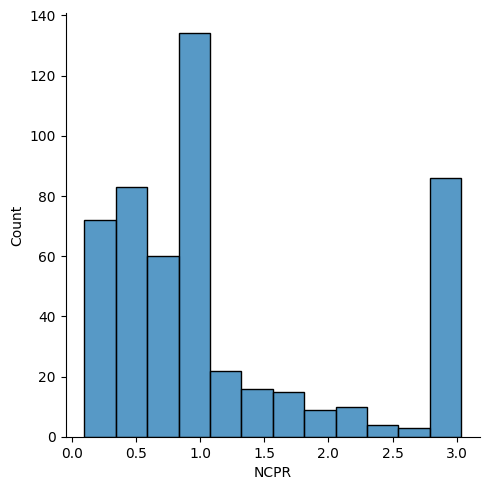

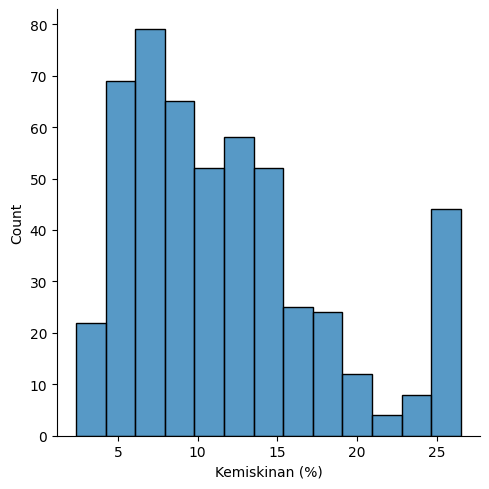

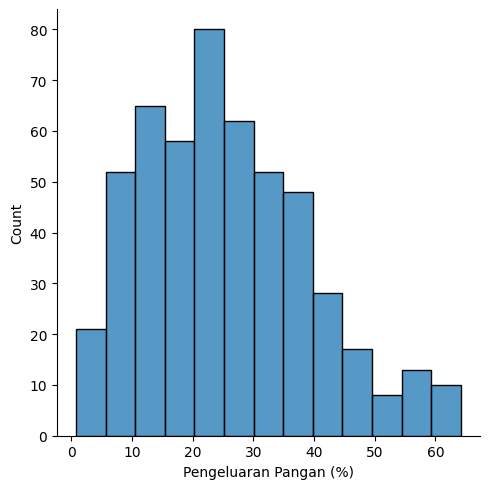

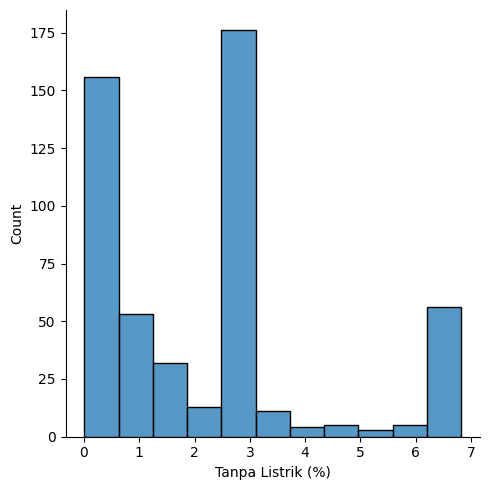

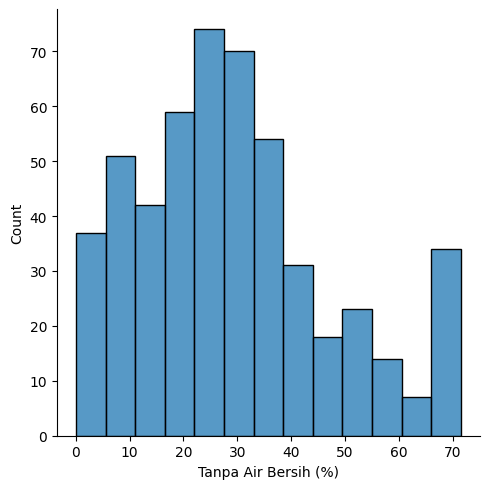

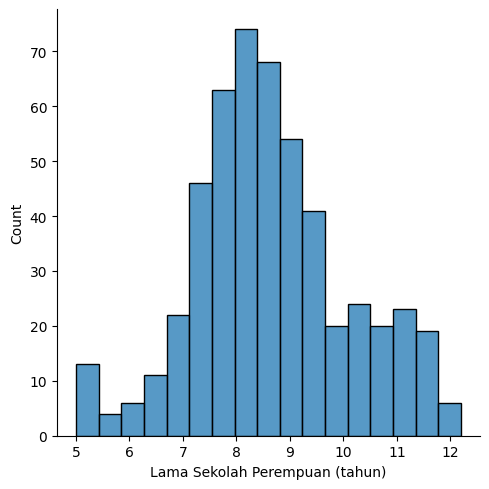

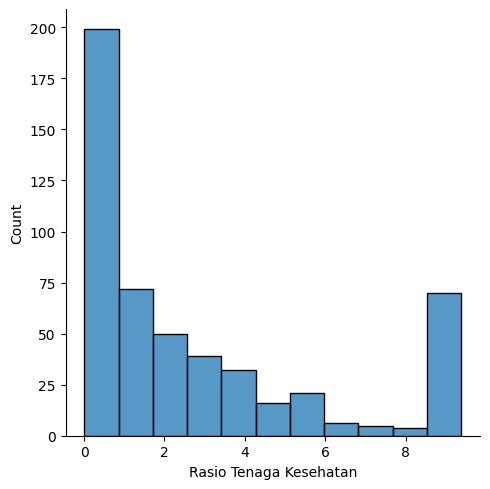

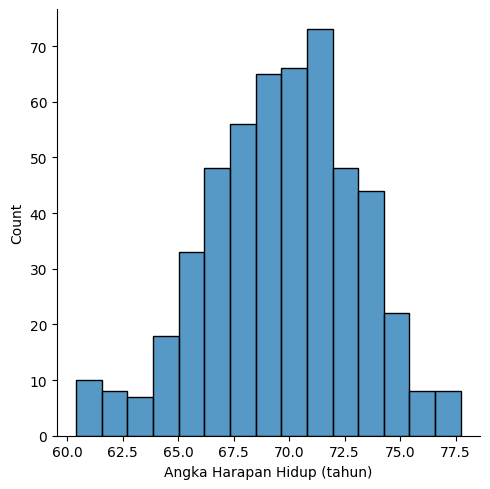

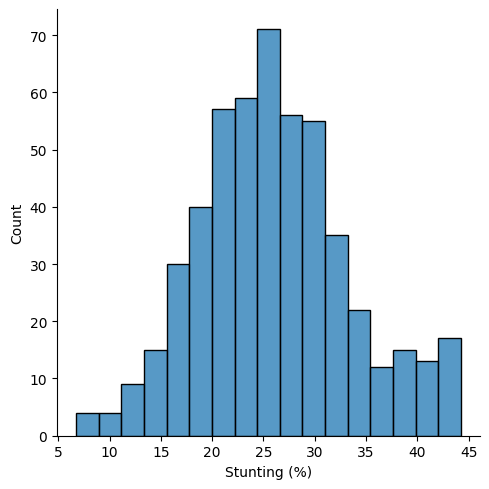

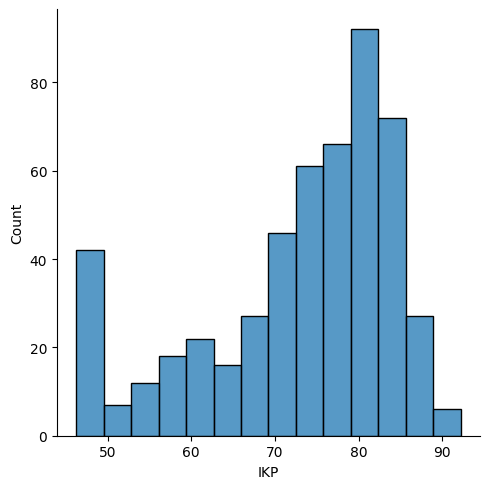

In [100]:
import seaborn as sns

columns_to_check = ['NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)', 'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan', 'Angka Harapan Hidup (tahun)', 'Stunting (%)', 'IKP']

# Assuming df_net is a DataF
# rame and you want to plot each column separately
for column in columns_to_check:
    sns.displot(df_net[column])

In [126]:

def categorize_komposit(value):
    if value == 4:
        return 'Agak Tahan'
    elif value == 5:
        return 'Tahan'
    elif value == 6:
        return 'Sangat Tahan'
    else:
        return 'Lainnya'

df_net['Komposit_Kategori'] = df_net['Komposit'].apply(categorize_komposit)

In [112]:
# Memisahkan fitur dan target
X = df_net[columns_to_check].values
y = df_net['Komposit_Kategori'].values


0.751937984496124

In [127]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [129]:

# Standarisasi fitur
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Melatih model DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [130]:
# Memprediksi data uji
y_pred = classifier.predict(X_test)


In [132]:
# Evaluasi model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.9612403100775194
Classification Report: 
              precision    recall  f1-score   support

  Agak Tahan       0.78      0.88      0.82         8
     Lainnya       0.96      0.96      0.96        23
Sangat Tahan       1.00      0.97      0.99        76
       Tahan       0.91      0.95      0.93        22

    accuracy                           0.96       129
   macro avg       0.91      0.94      0.93       129
weighted avg       0.96      0.96      0.96       129



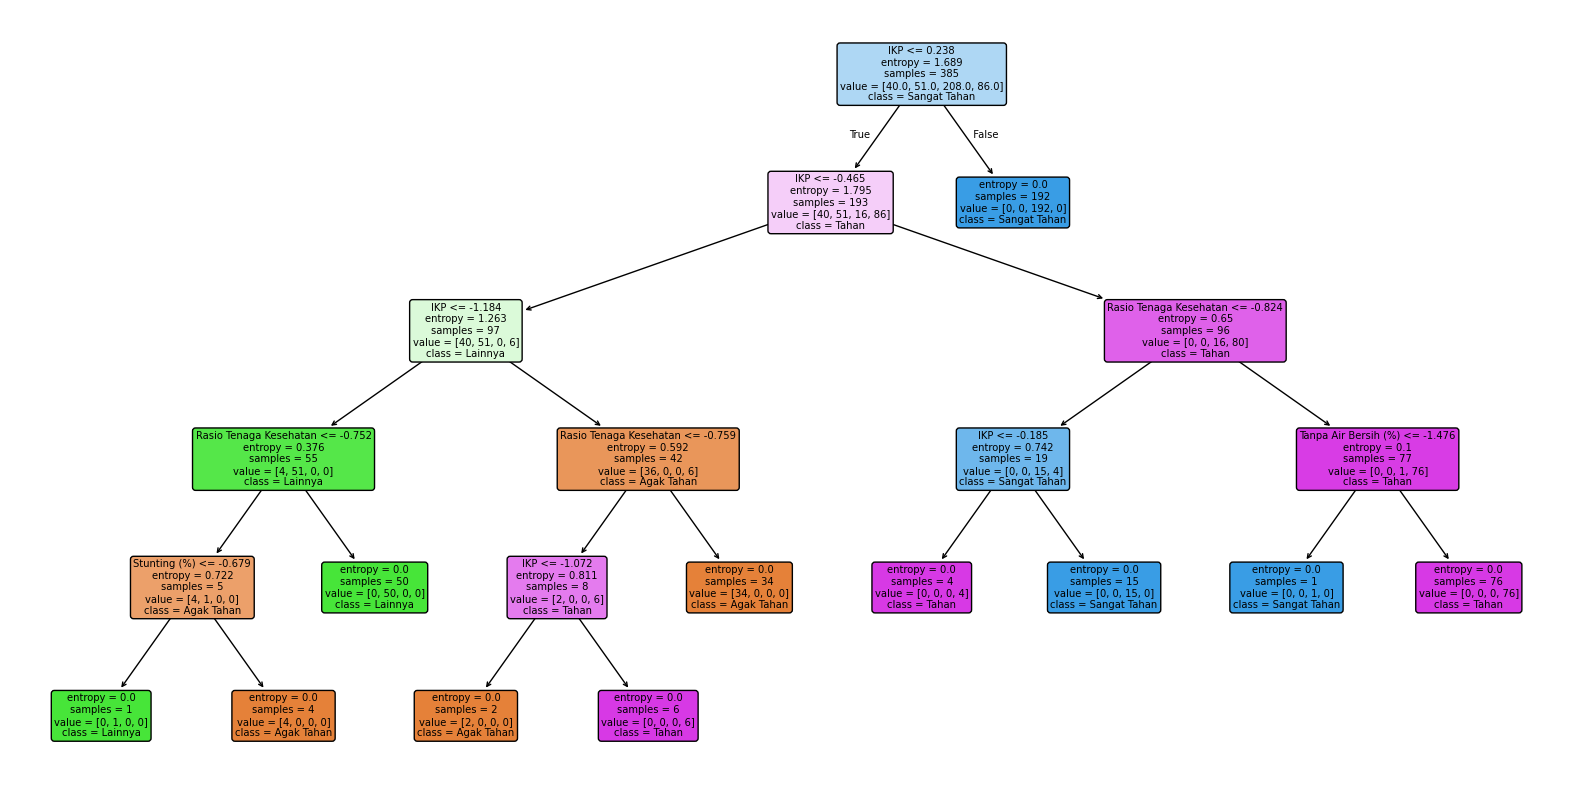

In [131]:
# Visualisasikan decision tree
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=columns_to_check, class_names=classifier.classes_, rounded=True)
plt.show()


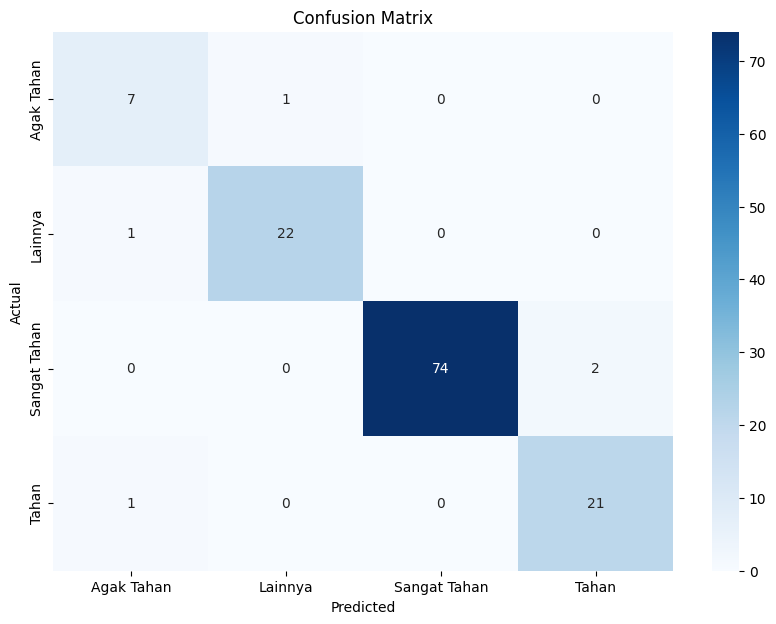

In [135]:
# Membuat confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [136]:
# Contoh data baru
data_baru = np.array([[0.5, 15.0, 30.0, 2.0, 40.0, 9.0, 2.5, 68.0, 30.0, 70.0]])

# Standarisasi data baru
data_baru = sc.transform(data_baru)

# Prediksi label untuk data baru
prediksi_label = classifier.predict(data_baru)

print(f'Prediksi label untuk data baru: {prediksi_label[0]}')

Prediksi label untuk data baru: Tahan


**DATA KEDUA**


In [138]:
df_net2 = pd.read_csv('FSVA-Aceh_2022_289_Kecamatan.csv')
df_net2.head()

,Wilayah,Komposit,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Kesakitan,Stunting (%),IKP,IKP Ranking,Unnamed: 13
0,aceh selatan - bakongan,2,3.85,13.18,7.16,0.0,68.00,7.47,100.00,8.70,19.17,50.13,254,NaN
1,aceh selatan - kluet utara,6,0.00,13.18,13.55,0.0,34.24,8.83,40.02,18.16,4.00,80.52,47,NaN
2,aceh selatan - kluet selatan,6,0.00,13.18,7.13,0.0,53.56,8.65,100.00,7.98,1.84,78.96,68,NaN
3,aceh selatan - labuhan haji,6,0.01,13.18,6.32,0.0,10.28,8.82,57.11,11.22,1.61,87.82,8,NaN
4,aceh selatan - meukek,6,0.01,13.18,22.07,0.0,38.40,9.16,100.00,9.23,2.08,79.32,61,NaN


In [139]:
df_net2.isna().sum()
df_net2 = df_net2.drop(columns=['Unnamed: 13'])
df_net2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Wilayah                         289 non-null    object 
 1   Komposit                        289 non-null    int64  
 2   NCPR                            289 non-null    float64
 3   Kemiskinan (%)                  289 non-null    float64
 4   Pengeluaran Pangan (%)          289 non-null    float64
 5   Tanpa Listrik (%)               289 non-null    float64
 6   Tanpa Air Bersih (%)            289 non-null    float64
 7   Lama Sekolah Perempuan (tahun)  289 non-null    float64
 8   Rasio Tenaga Kesehatan          289 non-null    float64
 9   Angka Kesakitan                 289 non-null    float64
 10  Stunting (%)                    289 non-null    float64
 11  IKP                             289 non-null    float64
 12  IKP Ranking                     289 

In [141]:
df_net2.describe()

,Komposit,NCPR,Kemiskinan (%),Pengeluaran Pangan (%),Tanpa Listrik (%),Tanpa Air Bersih (%),Lama Sekolah Perempuan (tahun),Rasio Tenaga Kesehatan,Angka Kesakitan,Stunting (%),IKP,IKP Ranking
count,289.000000,289.000000,289.000000,289.000000,289.00000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,4.750865,0.232076,15.850069,15.501003,0.14654,30.693702,9.511073,71.690727,12.635294,16.312941,71.561315,122.162630
std,1.181545,0.964856,3.055934,8.433863,0.57441,23.069159,1.175835,34.252252,5.020791,11.073885,11.887831,80.379166
min,1.000000,0.000000,7.610000,0.840000,0.00000,0.000000,7.470000,2.250000,1.900000,0.000000,18.610000,1.000000
25%,4.000000,0.000000,13.340000,10.100000,0.00000,11.140000,8.750000,38.820000,8.700000,6.920000,65.840000,48.000000
50%,5.000000,0.000000,15.260000,13.450000,0.00000,26.410000,9.280000,96.580000,11.410000,14.620000,72.980000,120.000000
75%,6.000000,0.010000,18.980000,18.350000,0.00000,45.040000,10.070000,100.000000,15.320000,23.360000,79.200000,192.000000
max,6.000000,5.000000,20.360000,56.520000,3.42000,85.830000,13.660000,100.000000,27.220000,51.720000,96.480000,264.000000


In [142]:
columns_to_check2 = ['Komposit', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)', 'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan', 'Angka Harapan Hidup (tahun)', 'Stunting (%)', 'IKP']

for column in columns_to_check2:
    df_net[column] = df_net[column].replace(0, np.nan)
    mean = int(df_net[column].mean(skipna=True))
    df_net[column] = df_net[column].replace(np.nan, mean)

In [143]:
# menghitung jumlah outlier menggunakan metode IQR
def jumlah_outlier(df, kolom):
    quartile_1 = df[kolom].quantile(0.25)
    quartile_3 = df[kolom].quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr

    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    return outliers.shape[0]

# menghitung persentase jumlah outlier menggunakan metode IQR
def persen_outlier(df, kolom):
    quartile_1 = df[kolom].quantile(0.25)
    quartile_3 = df[kolom].quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - 1.5 * iqr
    upper_bound = quartile_3 + 1.5 * iqr

    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    persentase_outlier = (outliers.shape[0] / df.shape[0]) * 100
    return persentase_outlier

# kolom yang memiliki outlier berdasarkan hasil visualisasi boxplot dari kolom tersebut
feature_outlier_user2 = ['Komposit', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)', 'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan', 'Angka Harapan Hidup (tahun)', 'Stunting (%)', 'IKP']

# menampilkan jumlah serta persentase outlier pada tabel user
print("Jumlah outlier tabel user")
for feature2 in feature_outlier_user2:
  persentase_outlier2 = persen_outlier(df_net2, feature) # menghitung persentase jumlah outlier
  jumlah_outliers2 = jumlah_outlier(df_net2, feature) # menghitung jumlah outlier
  formatted_persentase_outlier2 = "{:.2f}".format(persentase_outlier2)
  print(feature2, ' : ', jumlah_outliers2, ' : ', formatted_persentase_outlier2, '%')


Jumlah outlier tabel user
Komposit  :  11  :  3.81 %
NCPR  :  11  :  3.81 %
Kemiskinan (%)  :  11  :  3.81 %
Pengeluaran Pangan (%)  :  11  :  3.81 %
Tanpa Listrik (%)  :  11  :  3.81 %
Tanpa Air Bersih (%)  :  11  :  3.81 %
Lama Sekolah Perempuan (tahun)  :  11  :  3.81 %
Rasio Tenaga Kesehatan  :  11  :  3.81 %
Angka Harapan Hidup (tahun)  :  11  :  3.81 %
Stunting (%)  :  11  :  3.81 %
IKP  :  11  :  3.81 %


In [146]:
# handling outliers menggunakan metode IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# kolom numerik
heandling_outlier_user2 = ['Komposit', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)', 'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan', 'Angka Kesakitan', 'Stunting (%)', 'IKP']

# handling outlier pada kolom yang memiliki nilai outlier
for column2 in heandling_outlier_user2:
    handle_outliers_iqr(df_net2, column2)

# menampilkan jumlah serta persentase outlier pada tabel user
print("Jumlah outlier tabel user")
for feature2 in heandling_outlier_user2:
    persentase_outlier2 = persen_outlier(df_net2, feature2) # menghitung persentase jumlah outlier
    jumlah_outliers2 = jumlah_outlier(df_net2, feature2) # menghitung jumlah outlier
    formatted_persentase_outlier2 = "{:.2f}".format(persentase_outlier2)
    print(feature2, ' : ', jumlah_outliers2, ' : ', formatted_persentase_outlier2, '%')

Jumlah outlier tabel user
Komposit  :  0  :  0.00 %
NCPR  :  0  :  0.00 %
Kemiskinan (%)  :  0  :  0.00 %
Pengeluaran Pangan (%)  :  0  :  0.00 %
Tanpa Listrik (%)  :  0  :  0.00 %
Tanpa Air Bersih (%)  :  0  :  0.00 %
Lama Sekolah Perempuan (tahun)  :  0  :  0.00 %
Rasio Tenaga Kesehatan  :  0  :  0.00 %
Angka Kesakitan  :  0  :  0.00 %
Stunting (%)  :  0  :  0.00 %
IKP  :  0  :  0.00 %


In [151]:
columns_to_check2 = ['Komposit', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)', 'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan', 'Angka Kesakitan', 'Stunting (%)', 'IKP']

for column in columns_to_check2:
    df_net2[column] = df_net2[column].replace(0, np.nan)
    mean = df_net2[column].mean(skipna=True)
    df_net2[column] = df_net2[column].replace(np.nan, mean)

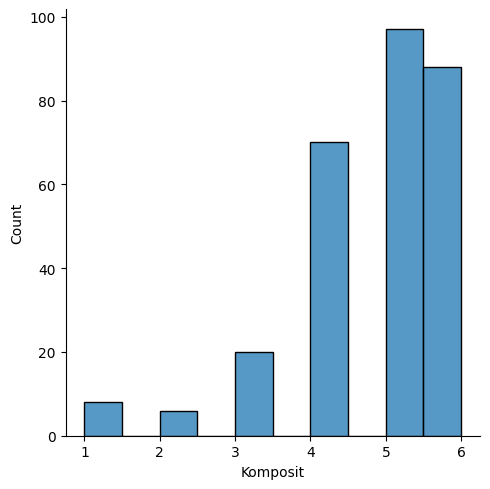

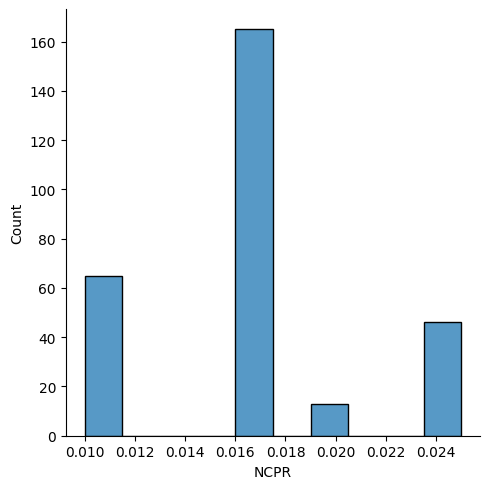

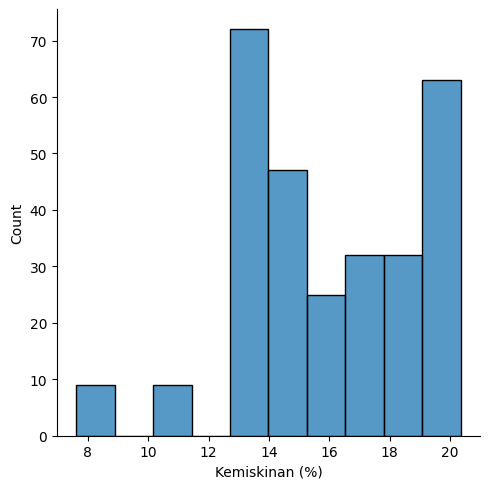

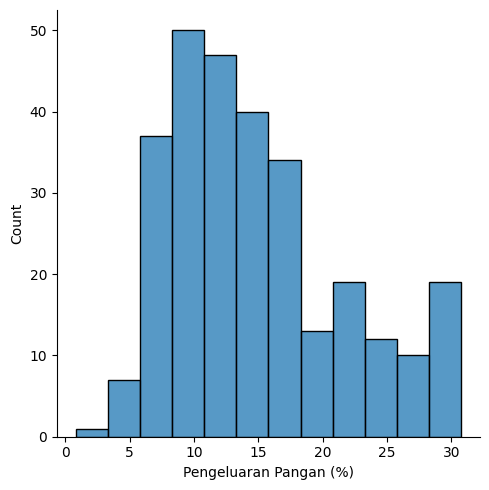

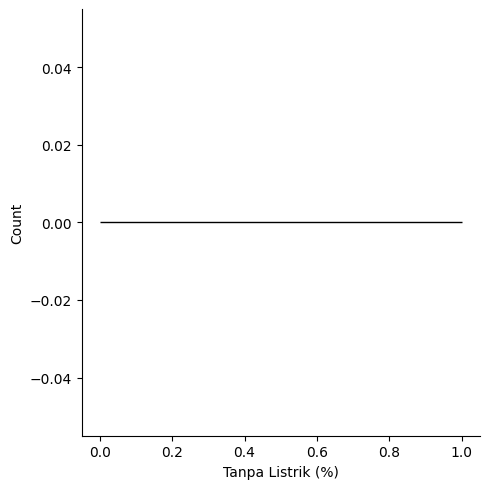

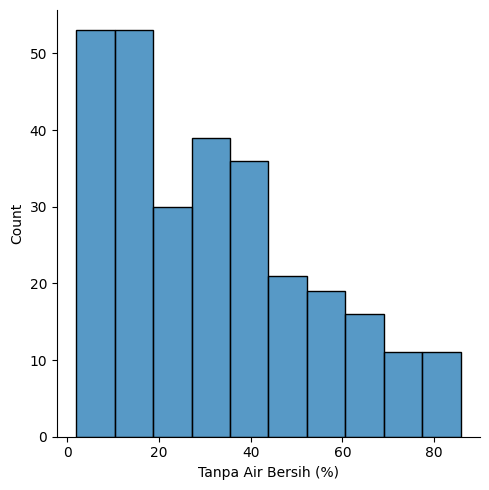

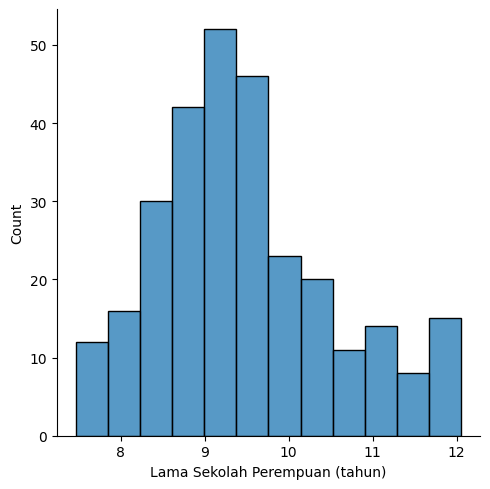

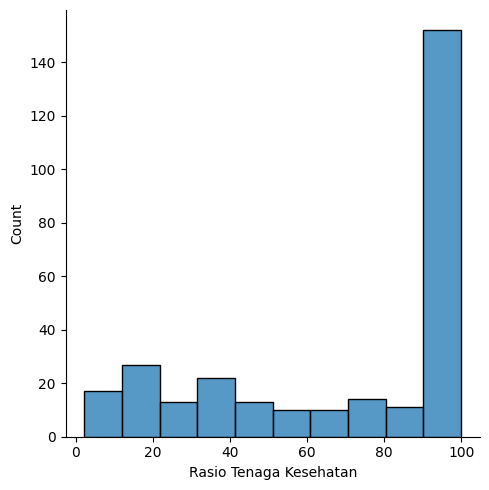

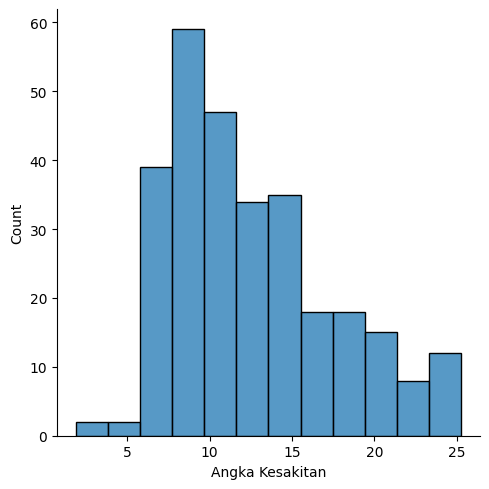

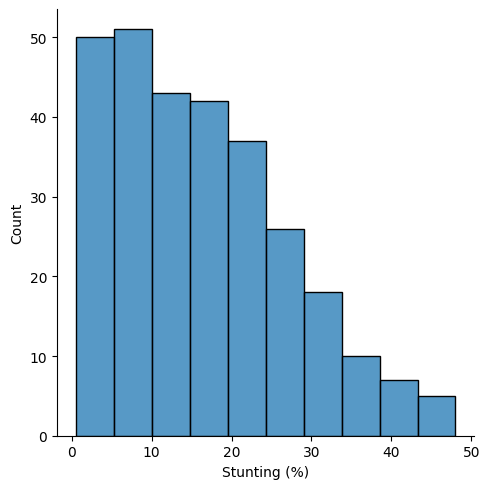

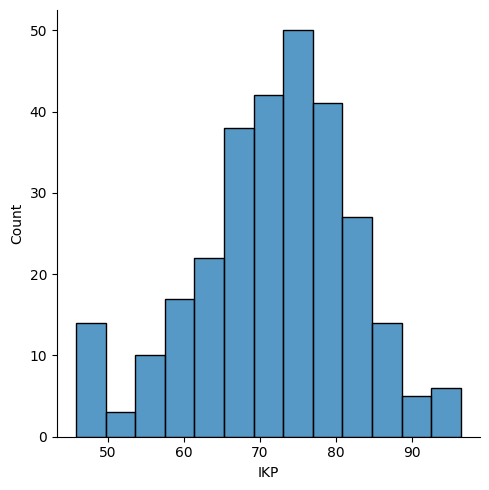

In [152]:
import seaborn as sns

columns_to_check2 = ['Komposit', 'NCPR', 'Kemiskinan (%)', 'Pengeluaran Pangan (%)', 'Tanpa Listrik (%)', 'Tanpa Air Bersih (%)', 'Lama Sekolah Perempuan (tahun)', 'Rasio Tenaga Kesehatan', 'Angka Kesakitan', 'Stunting (%)', 'IKP']

# Assuming df_net is a DataF
# rame and you want to plot each column separately
for column2 in columns_to_check2:
    sns.displot(df_net2[column2])

In [154]:

def categorize_komposit2(value2):
    if value2 == 4:
        return 'Agak Tahan'
    elif value2 == 5:
        return 'Tahan'
    elif value2 == 6:
        return 'Sangat Tahan'
    else:
        return 'Lainnya'

df_net2['Komposit_Kategori'] = df_net2['Komposit'].apply(categorize_komposit2)

In [156]:
# Memisahkan fitur dan target
X = df_net2[columns_to_check2].values
y = df_net2['Komposit_Kategori'].values


In [159]:
# Membagi data menjadi data latih dan data uji
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)

# Standarisasi fitur
sc2 = StandardScaler()
X_train2 = sc2.fit_transform(X_train2)
X_test2 = sc2.transform(X_test2)

# Melatih model DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier2.fit(X_train2, y_train2)

/home/ibnsuaidi/.local/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/ibnsuaidi/.local/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/ibnsuaidi/.local/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [161]:
# Memprediksi data uji
y_pred2 = classifier2.predict(X_test2)

In [162]:
# Evaluasi model
print(f'Accuracy: {accuracy_score(y_test2, y_pred2)}')
print(f'Classification Report: \n{classification_report(y_test2, y_pred2)}')

Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

  Agak Tahan       1.00      1.00      1.00        14
     Lainnya       1.00      1.00      1.00         6
Sangat Tahan       1.00      1.00      1.00        20
       Tahan       1.00      1.00      1.00        33

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



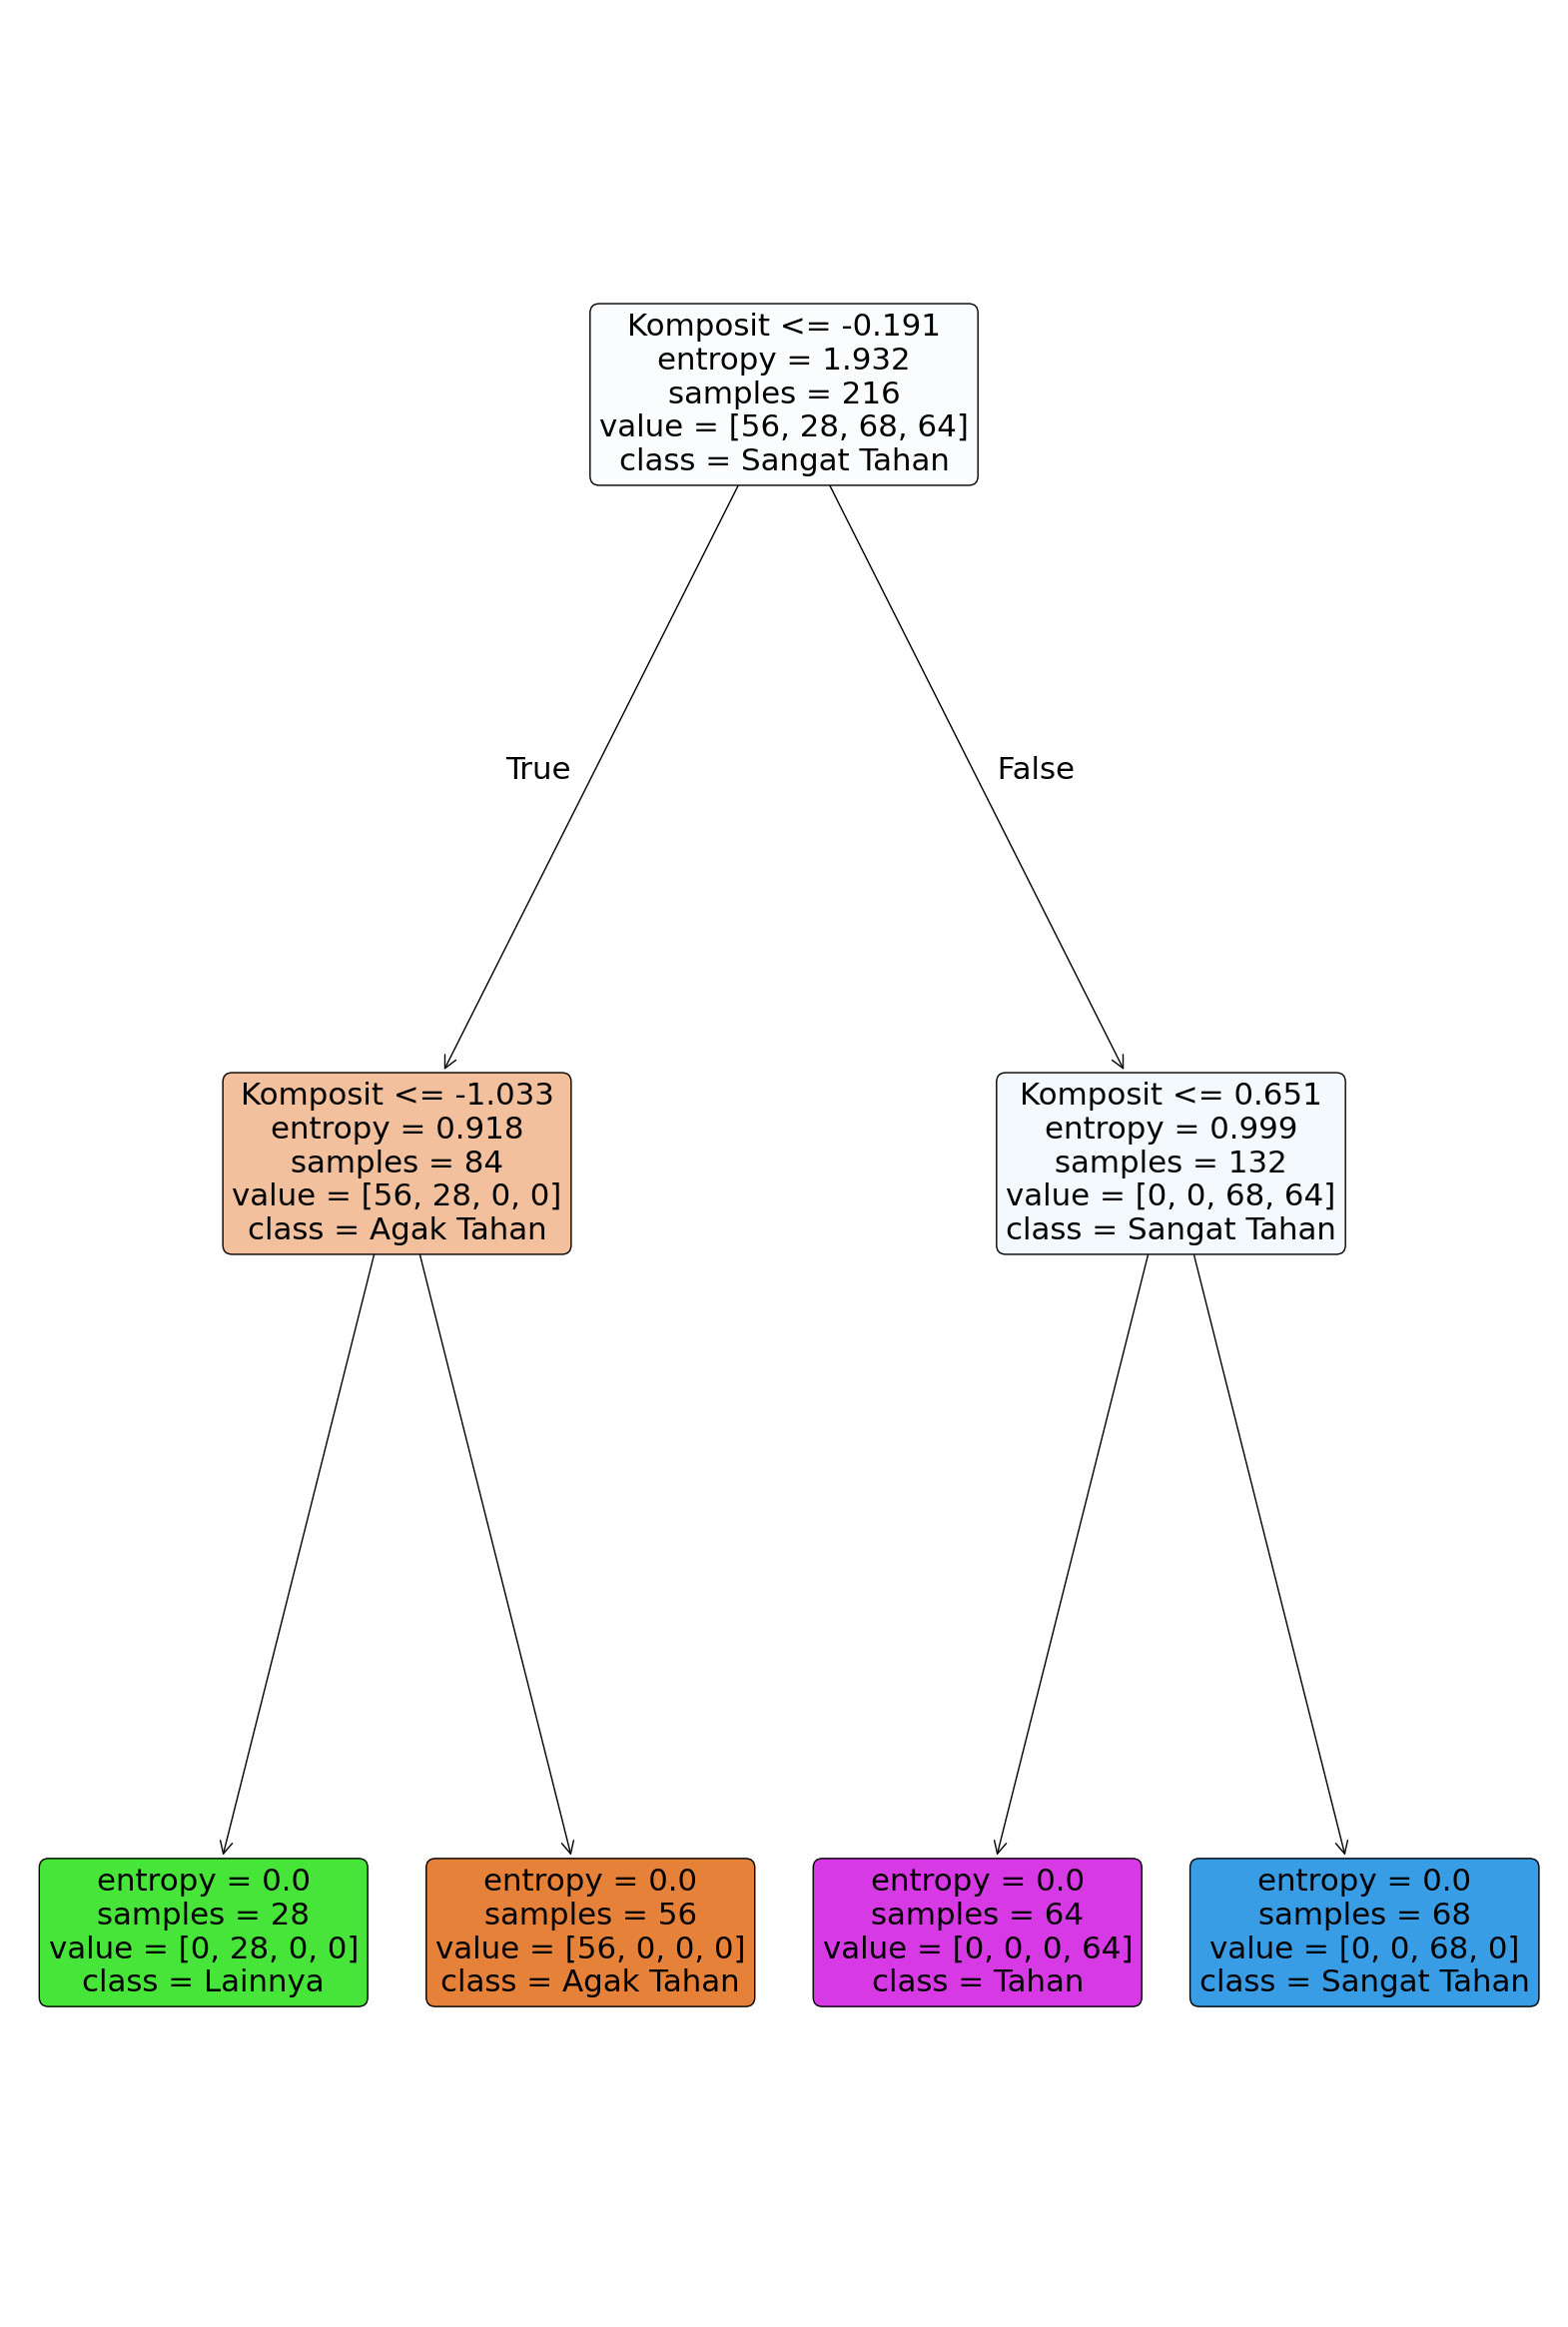

In [167]:
from sklearn.tree import plot_tree

# Visualisasikan decision tree
plt.figure(figsize=(20,30))
plot_tree(classifier2, filled=True, feature_names=columns_to_check2, class_names=classifier2.classes_, rounded=True)
plt.show()

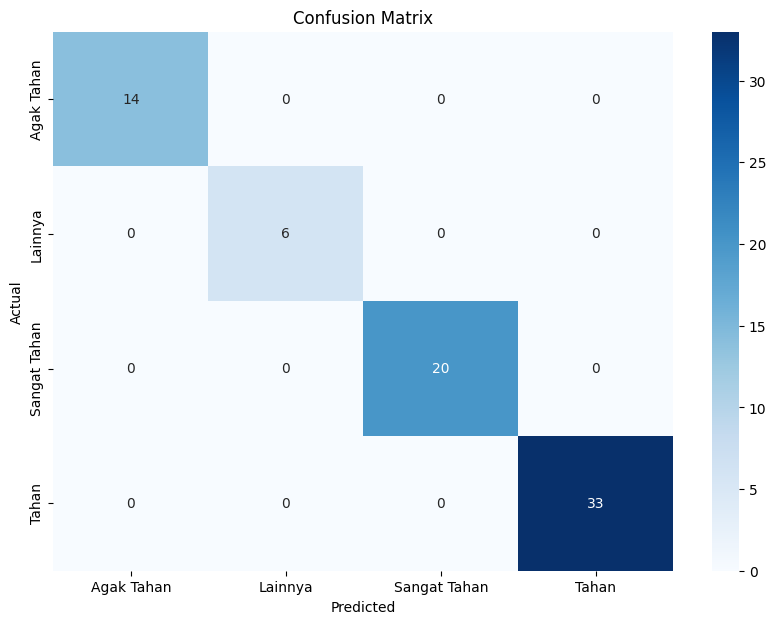

In [168]:
# Membuat confusion matrix
cf_matrix2 = confusion_matrix(y_test2, y_pred2)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=classifier2.classes_, yticklabels=classifier2.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


In [179]:

data_baru2 = np.array([[20.0, 10.0, 20.0, 5.0, 30.0, 8.0, 3.0, 60.0, 25.0, 65.0, 1.0]])

# Standarisasi data baru
data_baru2 = sc2.transform(data_baru2)

# Prediksi label untuk data baru
prediksi_label2 = classifier2.predict(data_baru2)

print(f'Prediksi label untuk data baru: {prediksi_label2[0]}')

Prediksi label untuk data baru: Sangat Tahan
